In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [127]:
# Define data directory and file names
data_directory = r"C:\Users\headc\Documents\Bellevue\DSC680\Project 3\Data"

platform_shop_file = "WhatsgoodlyData-6.csv"
social_influencer_file = "social media influencers - Tiktok sep 2022.csv"
purchase_hist_file = "social.csv"
thoughts_file = "Whatsgoodly - Thought Catalog Influencers.csv"

# Read the datasets
platform_shop_df = pd.read_csv(os.path.join(data_directory, platform_shop_file))
social_influencer_df = pd.read_csv(os.path.join(data_directory, social_influencer_file))
purchase_hist_df = pd.read_csv(os.path.join(data_directory, purchase_hist_file))
thoughts_df = pd.read_csv(os.path.join(data_directory, thoughts_file)) 

In [128]:
# Check for missing values in platform_shop_df
print("Missing values in platform_shop_df:")
print(platform_shop_df.isnull().sum())

# Check for missing values in social_influencer_df
print("\nMissing values in social_influencer_df:")
print(social_influencer_df.isnull().sum())

# Check for missing values in purchase_hist_df
print("\nMissing values in purchase_hist_df:")
print(purchase_hist_df.isnull().sum())

# Check for missing values in thoughts_df
print("\nMissing values in thoughts_df:")
print(thoughts_df.isnull().sum())


Missing values in platform_shop_df:
Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

Missing values in social_influencer_df:
S.no             0
Tiktoker name    0
Tiktok name      1
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64

Missing values in purchase_hist_df:
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Missing values in thoughts_df:
Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64


In [129]:
# For found missing value, replace with a NA
social_influencer_df['Tiktok name'].fillna('Unknown', inplace=True)

In [130]:
# Get a statistical summary for platform_shop_df
print("\nSummary statistics for platform_shop_df:")
print(platform_shop_df.describe())

# Get a statistical summary for social_influencer_df
print("\nSummary statistics for social_influencer_df:")
print(social_influencer_df.describe())

# Get a statistical summary for purchase_hist_df
print("\nSummary statistics for purchase_hist_df:")
print(purchase_hist_df.describe())

# Get a statistical summary for thoughts_df
print("\nSummary statistics for thoughts_df:")
print(thoughts_df.describe())


Summary statistics for platform_shop_df:
             Count   Percentage
count  1450.000000  1450.000000
mean     35.013793     0.199313
std      95.055604     0.274989
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.063500
75%      20.000000     0.323750
max     947.000000     1.000000

Summary statistics for social_influencer_df:
              S.no
count  1000.000000
mean    500.500000
std     288.819436
min       1.000000
25%     250.750000
50%     500.500000
75%     750.250000
max    1000.000000

Summary statistics for purchase_hist_df:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000 

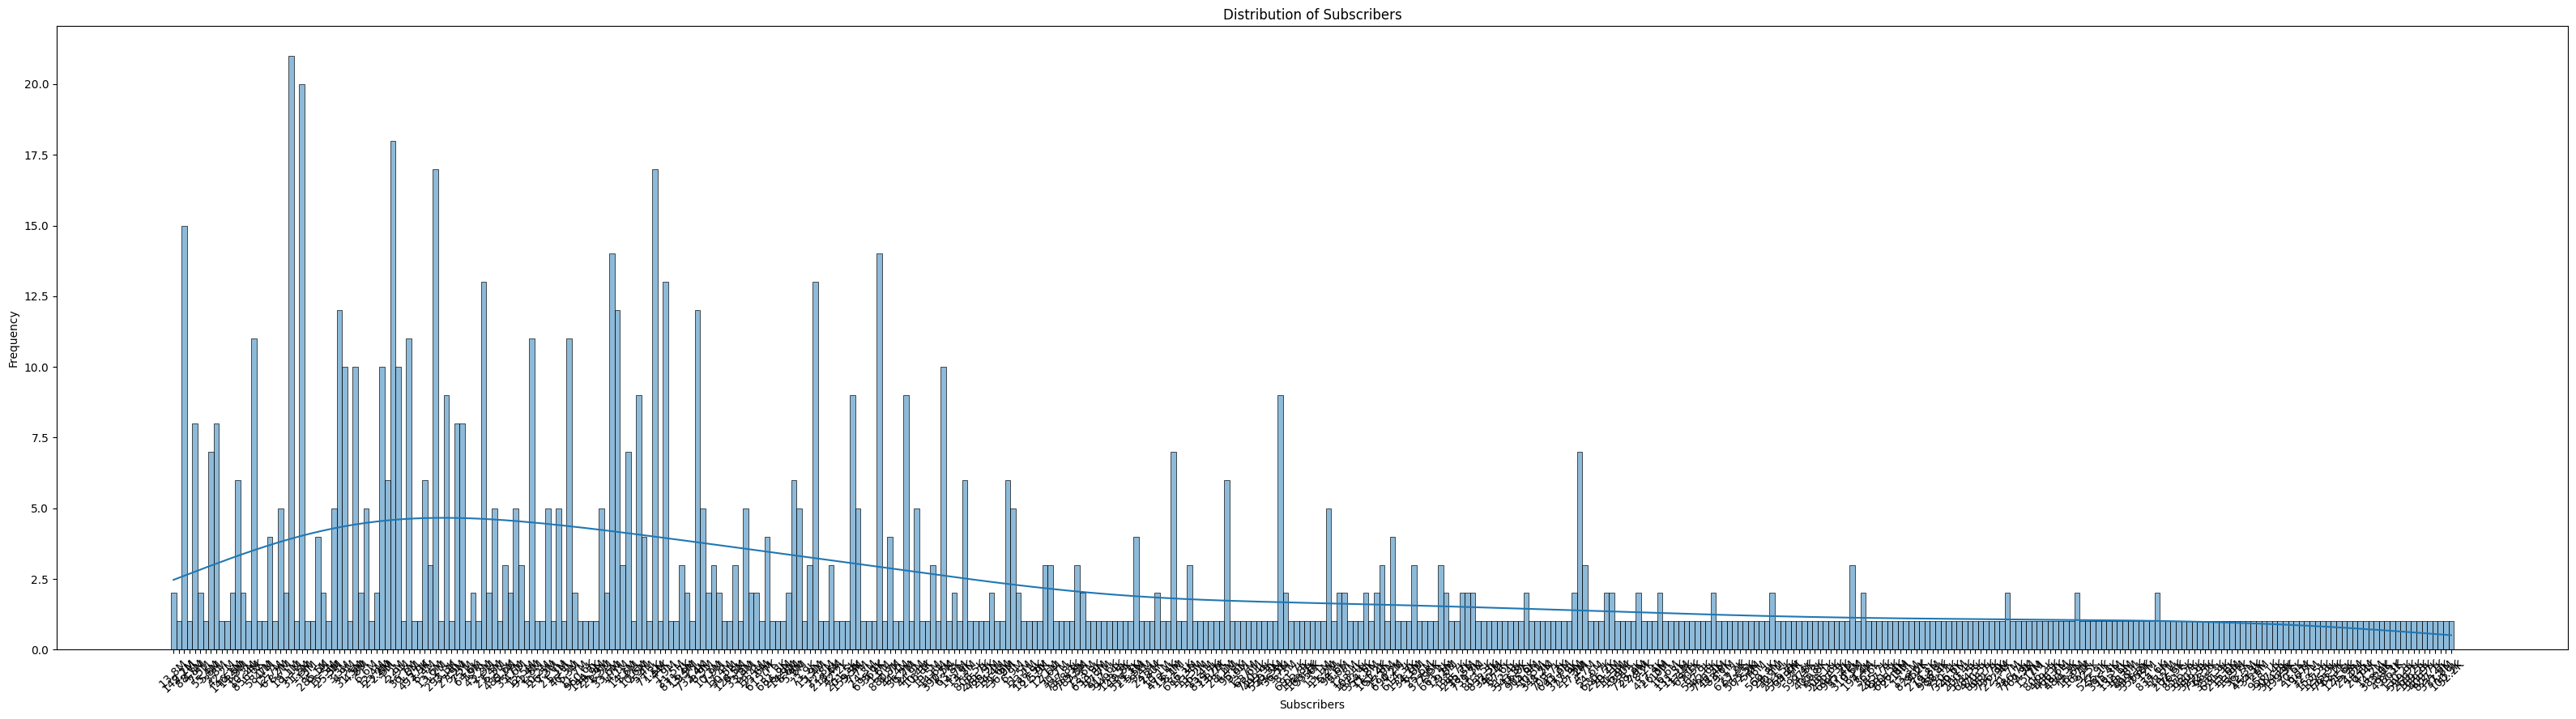

In [131]:
# Visualizing distributions
plt.figure(figsize=(40, 10))
sns.histplot(social_influencer_df['Subscribers'], bins=20, kde=True)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\headc\AppData\Local\Temp\ipykernel_22852\830749715.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = platform_shop_df.corr()


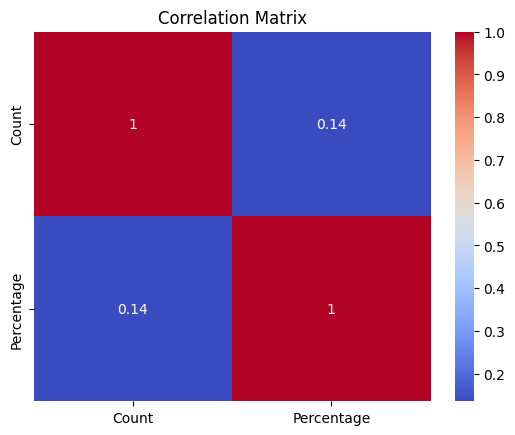

In [132]:
# Correlation Analysis
corr_matrix = platform_shop_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

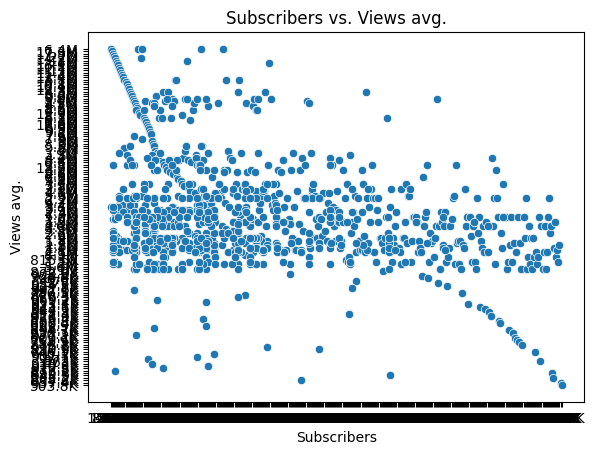

In [133]:
# Creating visualizations
sns.scatterplot(x='Subscribers', y='Views avg.', data=social_influencer_df)
plt.title('Subscribers vs. Views avg.')
plt.xlabel('Subscribers')
plt.ylabel('Views avg.')
plt.show()

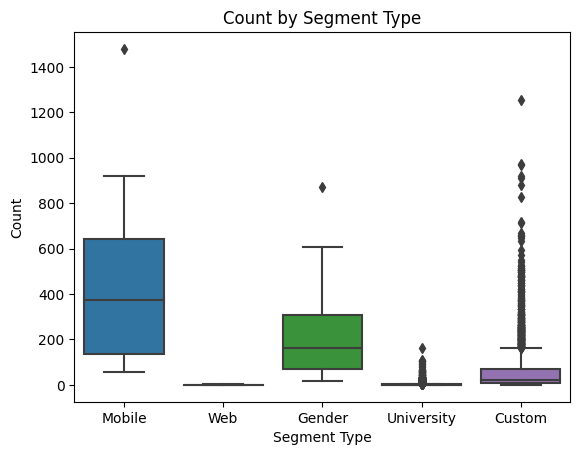

In [134]:
sns.boxplot(x='Segment Type', y='Count', data=thoughts_df)
plt.title('Count by Segment Type')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

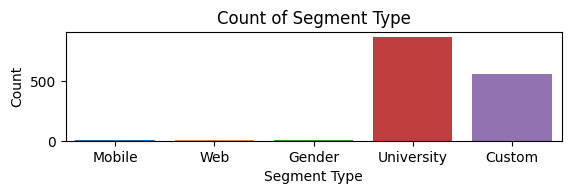

In [135]:
# Bar plot for Segment Type
plt.subplot(3, 1, 1)
sns.countplot(data=platform_shop_df, x='Segment Type')
plt.title('Count of Segment Type')
plt.xlabel('Segment Type')
plt.ylabel('Count')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.
  func(*args, **kwargs)
C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128024 (\N{ELEPHANT}) missing from current font.
  func(*args, **kwargs)
C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128039 (\N{PENGUIN}) missing from current font.
  func(*args, **kwargs)
C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128421 (\N{DESKTOP COMPUTER}) missing fr

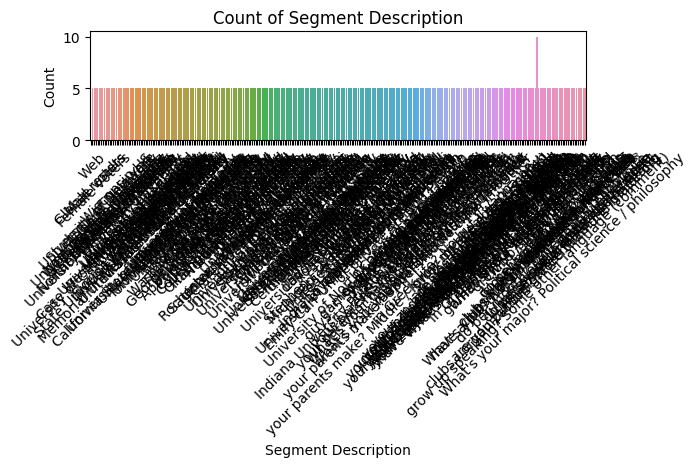

In [136]:
# Bar plot for Segment Description
plt.subplot(3, 1, 2)
sns.countplot(data=platform_shop_df, x='Segment Description')
plt.title('Count of Segment Description')
plt.xlabel('Segment Description')
plt.ylabel('Count')
plt.xticks(rotation=45)

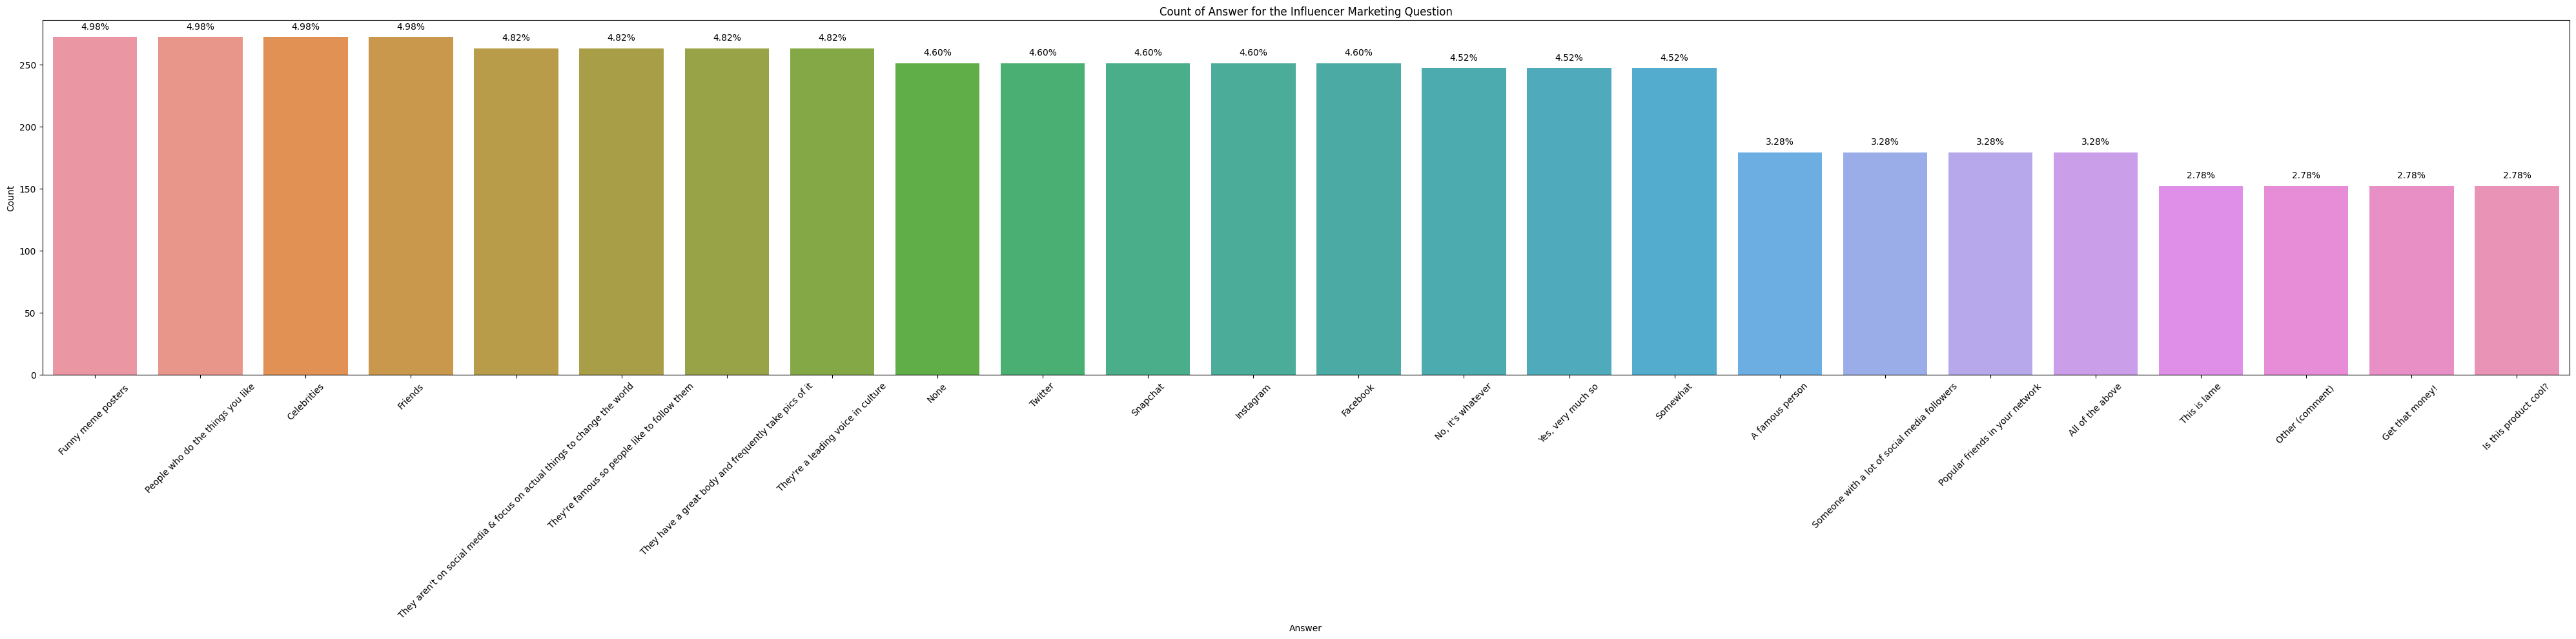

In [150]:
# Bar plot for Answer in thoughts_df
plt.figure(figsize=(40, 10)) 
sns.countplot(data=thoughts_df, x='Answer', order=thoughts_df['Answer'].value_counts().index)
plt.title('Count of Answer for the Influencer Marketing Question')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.xticks(rotation=45) 
# Add percentages to the top of each bar
total = float(len(thoughts_df)) 
for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x() + width / 2, height + 5
    plt.gca().text(x, y, '{:.2f}%'.format((height/total)*100), ha="center", va="bottom")

plt.tight_layout()
plt.show()

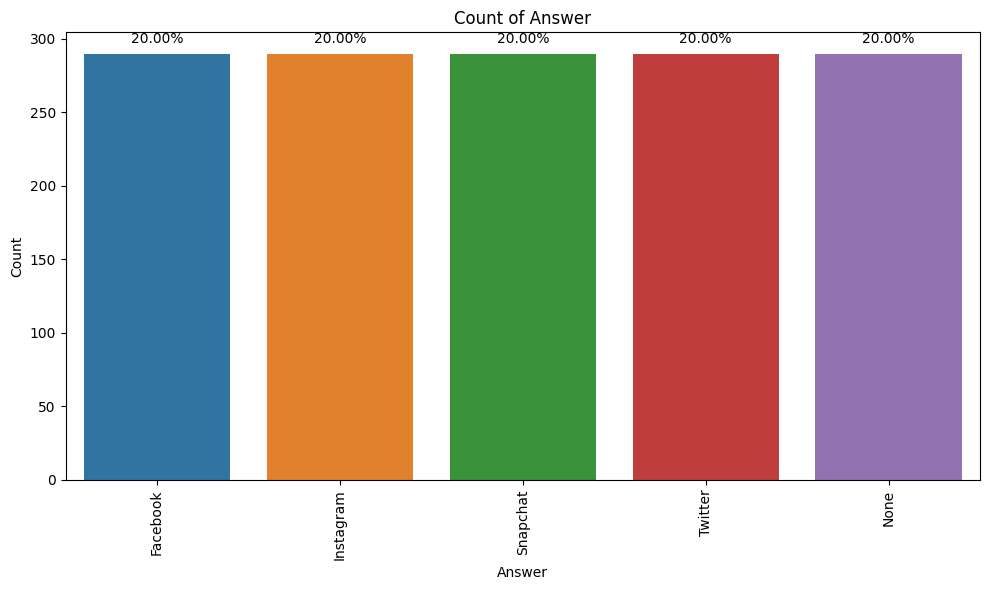

In [121]:
# Bar plot for Answer
plt.figure(figsize=(10, 6)) 
sns.countplot(data=platform_shop_df, x='Answer', order=platform_shop_df['Answer'].value_counts().index)
plt.title('Count of Answer')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Add percentages to the top of each bar for each social platform or other
total = float(len(platform_shop_df)) 
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 5, '{:.2f}%'.format((height/total)*100), ha="center", va="bottom")

plt.tight_layout()
plt.show()

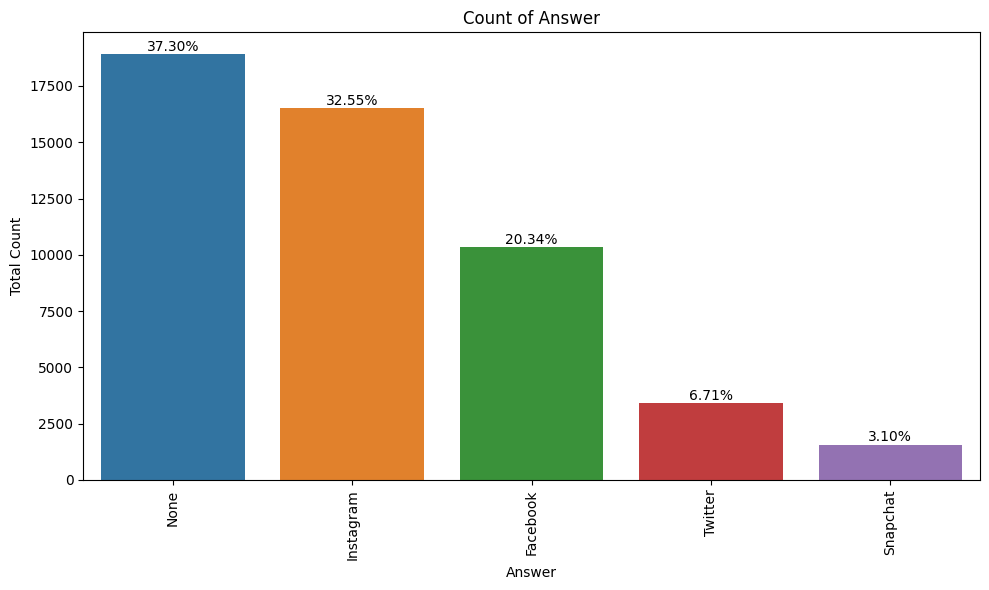

In [152]:
# Group by Answer and calculate the total count
answer_counts = platform_shop_df.groupby('Answer')['Count'].sum().reset_index()

# Bar plot for Answer
plt.figure(figsize=(10, 6)) 
sns.barplot(data=answer_counts, x='Answer', y='Count', order=answer_counts.sort_values('Count', ascending=False)['Answer'])
plt.title('Count of Answer')
plt.xlabel('Answer')
plt.ylabel('Total Count')
plt.xticks(rotation=90)

# Add percentages to the top of each bar for each answer
total = float(answer_counts['Count'].sum()) 
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 5, '{:.2f}%'.format((height/total)*100), ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [122]:
# Feature Selection
# Relevant features from platform_shop_df
platform_shop_features = platform_shop_df[['Segment Type', 'Segment Description', 'Answer']]

# Relevant features from social_influencer_df
social_influencer_features = social_influencer_df[['Subscribers', 'Views avg.', 'Likes avg.', 'Comments avg.', 'Shares avg.']]

# Relevant features from purchase_hist_df
purchase_hist_features = purchase_hist_df[['Age', 'EstimatedSalary', 'Purchased']]

# Relevant features from thoughts_df
thoughts_features = thoughts_df[['Segment Type', 'Segment Description', 'Answer']]

# Displaying the selected features from each dataset
print("Platform Shop Features:")
print(platform_shop_features.head())
print("\nSocial Influencer Features:")
print(social_influencer_features.head())
print("\nPurchase History Features:")
print(purchase_hist_features.head())
print("\nThoughts Features:")
print(thoughts_features.head())

Platform Shop Features:
  Segment Type Segment Description     Answer
0       Mobile      Global results   Facebook
1       Mobile      Global results  Instagram
2       Mobile      Global results   Snapchat
3       Mobile      Global results    Twitter
4       Mobile      Global results       None

Social Influencer Features:
  Subscribers Views avg. Likes avg. Comments avg. Shares avg.
0       13.8M       6.4M       2.3M         50.2K       34.2K
1      149.2M      17.3M       2.3M         15.2K        8.7K
2        2.1M      17.9M     845.8K         53.9K        6.3K
3       88.7M        22M     906.6K          7.6K       26.2K
4        4.8M      14.2M       1.5M         14.5K       15.3K

Purchase History Features:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Thoughts Features:
  Segment Type Segment Description       

In [123]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns in platform_shop_df
platform_shop_df['Segment Type'] = label_encoder.fit_transform(platform_shop_df['Segment Type'])
platform_shop_df['Segment Description'] = label_encoder.fit_transform(platform_shop_df['Segment Description'])
platform_shop_df['Answer'] = label_encoder.fit_transform(platform_shop_df['Answer'])

# Encode categorical columns in social_influencer_df
social_influencer_df['Tiktoker name'] = label_encoder.fit_transform(social_influencer_df['Tiktoker name'])
social_influencer_df['Tiktok name'] = label_encoder.fit_transform(social_influencer_df['Tiktok name'])

# Encode categorical columns in thoughts_df
thoughts_df['Segment Type'] = label_encoder.fit_transform(thoughts_df['Segment Type'])
thoughts_df['Segment Description'] = label_encoder.fit_transform(thoughts_df['Segment Description'])
thoughts_df['Answer'] = label_encoder.fit_transform(thoughts_df['Answer'])
thoughts_df['Question'] = label_encoder.fit_transform(thoughts_df['Question'])

In [56]:
# # Initialize OneHotEncoder
# encoder = OneHotEncoder()

# # Perform one-hot encoding for platform_shop_df
# platform_shop_encoded = encoder.fit_transform(platform_shop_df[['Segment Type', 'Segment Description', 'Answer']])
# platform_shop_encoded_array = platform_shop_encoded.toarray()
# platform_shop_encoded_df = pd.DataFrame(platform_shop_encoded_array, columns=encoder.get_feature_names_out(['Segment Type', 'Segment Description', 'Answer']))
# platform_shop_features_encoded = pd.concat([platform_shop_df.drop(columns=['Segment Type', 'Segment Description', 'Answer']), platform_shop_encoded_df], axis=1)

# # Perform one-hot encoding for social_influencer_df
# social_influencer_encoded = encoder.fit_transform(social_influencer_df[['Tiktok name']])
# social_influencer_encoded_array = social_influencer_encoded.toarray()
# social_influencer_encoded_df = pd.DataFrame(social_influencer_encoded_array, columns=encoder.get_feature_names_out(['Tiktok name']))
# social_influencer_features_encoded = pd.concat([social_influencer_df.drop(columns=['Tiktok name']), social_influencer_encoded_df], axis=1)

# # Perform one-hot encoding for purchase_hist_df
# purchase_hist_encoded = encoder.fit_transform(purchase_hist_df[['Age', 'EstimatedSalary']])
# purchase_hist_encoded_array = purchase_hist_encoded.toarray()
# purchase_hist_encoded_df = pd.DataFrame(purchase_hist_encoded_array, columns=encoder.get_feature_names_out(['Age', 'EstimatedSalary']))
# purchase_hist_features_encoded = pd.concat([purchase_hist_df.drop(columns=['Age', 'EstimatedSalary']), purchase_hist_encoded_df], axis=1)

# # Perform one-hot encoding for thoughts_df
# thoughts_encoded = encoder.fit_transform(thoughts_df[['Segment Type', 'Segment Description', 'Answer']])
# thoughts_encoded_array = thoughts_encoded.toarray()
# thoughts_encoded_df = pd.DataFrame(thoughts_encoded_array, columns=encoder.get_feature_names_out(['Segment Type', 'Segment Description', 'Answer']))
# thoughts_features_encoded = pd.concat([thoughts_df.drop(columns=['Segment Type', 'Segment Description', 'Answer']), thoughts_encoded_df], axis=1)

In [124]:
# Apply normalization
scaler = MinMaxScaler()

# Normalize platform_shop_df
platform_shop_df[['Segment Type', 'Segment Description', 'Answer']] = scaler.fit_transform(platform_shop_df[['Segment Type', 'Segment Description', 'Answer']])

# Normalize social_influencer_df
social_influencer_df[['Tiktoker name', 'Tiktok name']] = scaler.fit_transform(social_influencer_df[['Tiktoker name', 'Tiktok name']])

# Normalize purchase_hist_df
purchase_hist_df[['Age', 'EstimatedSalary', 'Purchased']] = scaler.fit_transform(purchase_hist_df[['Age', 'EstimatedSalary', 'Purchased']])

# Normalize thoughts_df
thoughts_df[['Question', 'Segment Type', 'Segment Description', 'Answer']] = scaler.fit_transform(thoughts_df[['Question', 'Segment Type', 'Segment Description', 'Answer']])

In [69]:
# Define K-means clustering functions with different k values
def perform_kmeans(data, k_values):
    silhouette_scores = []
    wcss_scores = []
    models = []
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    for k in k_values:
        # Fit KMeans model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        models.append(kmeans)
        
        # Calculate silhouette score
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
        
        # Calculate within-cluster sum of squares (WCSS)
        wcss_scores.append(kmeans.inertia_)
        
    return silhouette_scores, wcss_scores, models

In [70]:
# Define k-values range for clustering
k_values = range(2, 11)

In [78]:
# Drop the 'Question' column from thoughts_df and platform_shop_df causing issues
# thoughts_df = thoughts_df.drop(columns=['Question'])
# platform_shop_df = platform_shop_df.drop(columns=['Question'])

# Perform K-means clustering on the normalized dataframes
silhouette_scores_platform_shop, wcss_scores_platform_shop, models_platform_shop = perform_kmeans(platform_shop_df, k_values)
# silhouette_scores_social_influencer, wcss_scores_social_influencer, models_social_influencer = perform_kmeans(social_influencer_df, k_values)
silhouette_scores_purchase_hist, wcss_scores_purchase_hist, models_purchase_hist = perform_kmeans(purchase_hist_df, k_values)
silhouette_scores_thoughts, wcss_scores_thoughts, models_thoughts = perform_kmeans(thoughts_df, k_values)

C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\headc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\h

Text(0, 0.5, 'Silhouette Score')

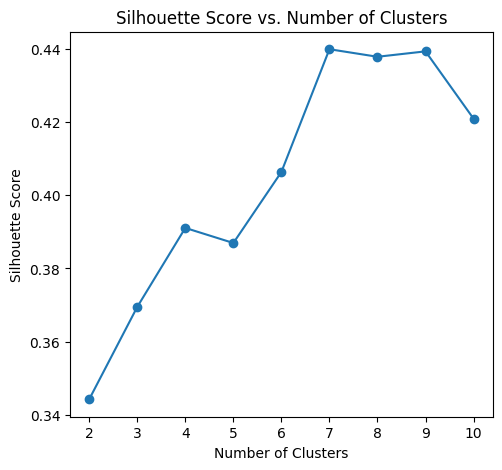

In [81]:
# Find Silhouette Score for optimal number of clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_platform_shop, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

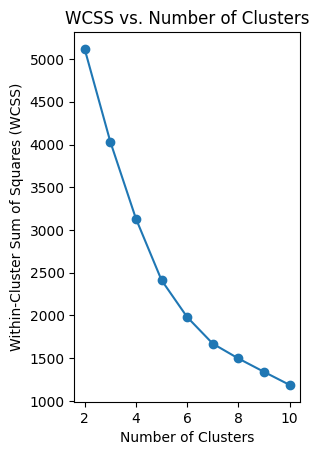

In [82]:
# Find WCSS 
plt.subplot(1, 2, 2)
plt.plot(k_values, wcss_scores_platform_shop, marker='o')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

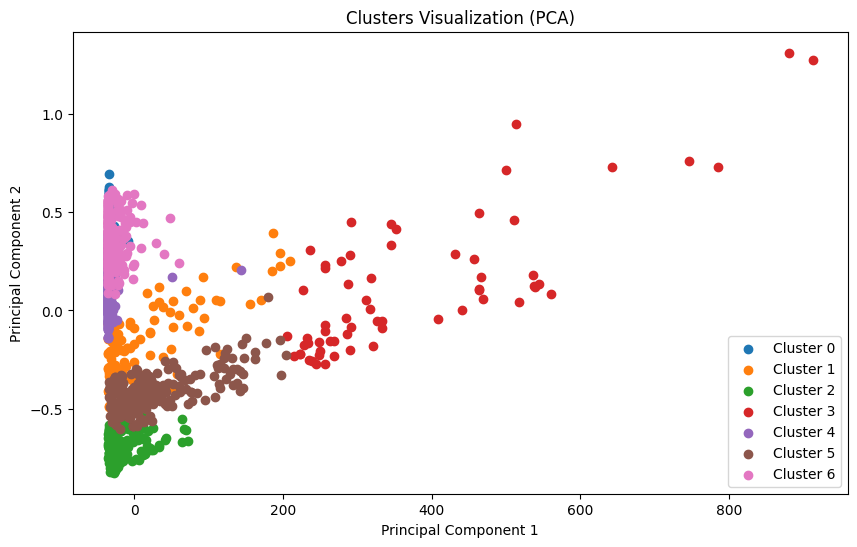

In [83]:
optimal_k = 7

# Visualize
optimal_model_platform_shop = models_platform_shop[optimal_k - 2] 
platform_shop_df['cluster_labels'] = optimal_model_platform_shop.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(platform_shop_df.drop(columns=['cluster_labels'])) 

plt.figure(figsize=(10, 6))
for label in np.unique(platform_shop_df['cluster_labels']):
    plt.scatter(components[platform_shop_df['cluster_labels']==label, 0], components[platform_shop_df['cluster_labels']==label, 1], label=f'Cluster {label}')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [98]:
cluster_characteristics = platform_shop_df.groupby('cluster_labels').mean() 
print(cluster_characteristics)

                Segment Type  Segment Description    Answer       Count  \
cluster_labels                                                            
0                   0.746503             0.368226  0.424825    1.965035   
1                   0.011574             0.177726  0.539352   48.296296   
2                   0.000000             0.846551  0.875000   17.789773   
3                   0.042969             0.603461  0.332031  409.484375   
4                   0.750000             0.374119  0.815955    1.123116   
5                   0.000000             0.847687  0.233259   61.486607   
6                   0.751484             0.379626  0.159496    5.089021   

                Percentage  
cluster_labels              
0                 0.878378  
1                 0.158463  
2                 0.050932  
3                 0.335359  
4                 0.013897  
5                 0.291835  
6                 0.133392  


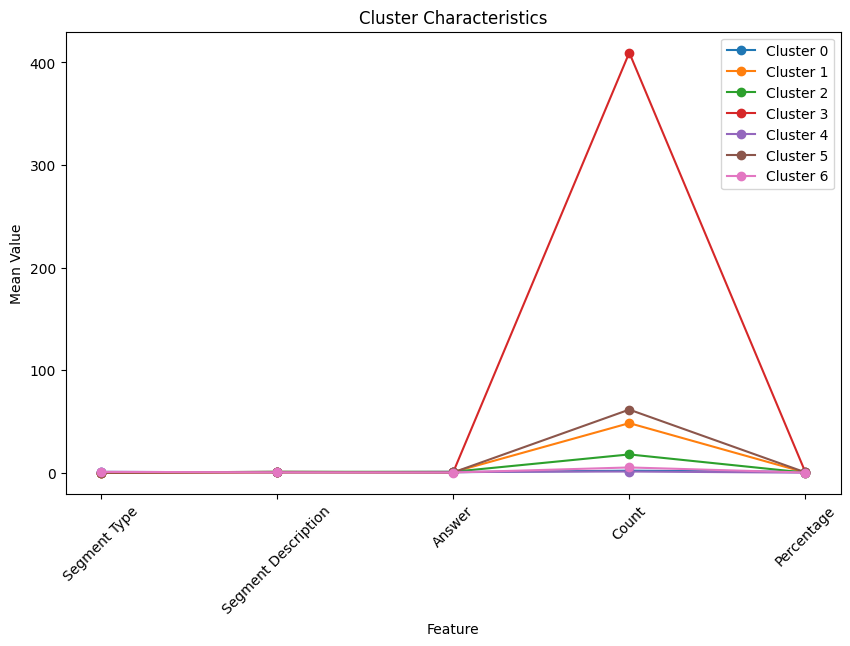

In [99]:
plt.figure(figsize=(10, 6))
for label in cluster_characteristics.index:
    plt.plot(cluster_characteristics.columns, cluster_characteristics.loc[label], marker='o', label=f'Cluster {label}')
plt.title('Cluster Characteristics')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Text(0, 0.5, 'Silhouette Score')

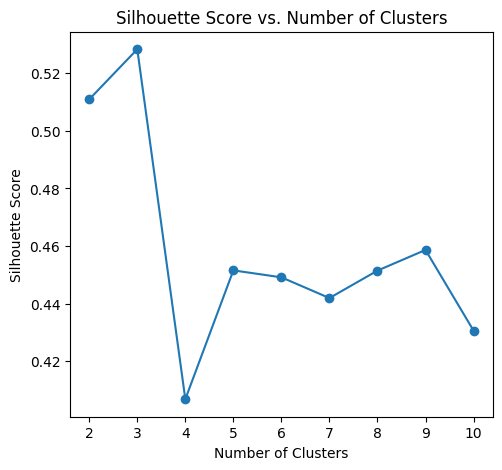

In [84]:
# Find Silhouette Score for optimal number of clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_purchase_hist, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

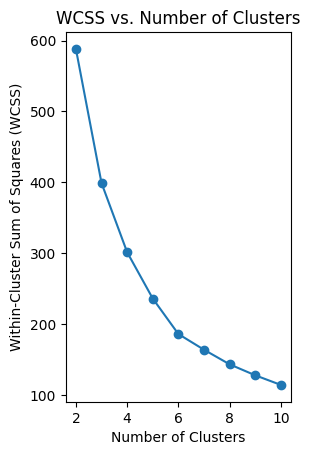

In [85]:
plt.subplot(1, 2, 2)
plt.plot(k_values, wcss_scores_purchase_hist, marker='o')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [101]:
cluster_characteristics_purchase_hist = purchase_hist_df.groupby('cluster_labels').mean()  # Calculate mean values for each cluster
print(cluster_characteristics_purchase_hist)

                     Age  EstimatedSalary  Purchased
cluster_labels                                      
0               0.341301         0.328995   0.000000
1               0.606366         0.745411   0.956522
2               0.802423         0.193762   0.964912


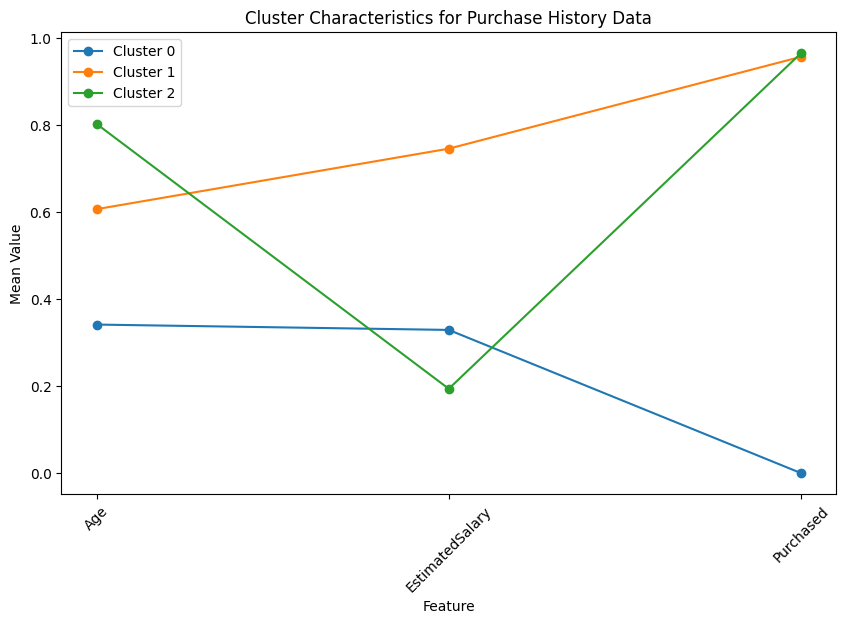

In [103]:
plt.figure(figsize=(10, 6))
for label in cluster_characteristics_purchase_hist.index:
    plt.plot(cluster_characteristics_purchase_hist.columns, cluster_characteristics_purchase_hist.loc[label], marker='o', label=f'Cluster {label}')
plt.title('Cluster Characteristics for Purchase History Data')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

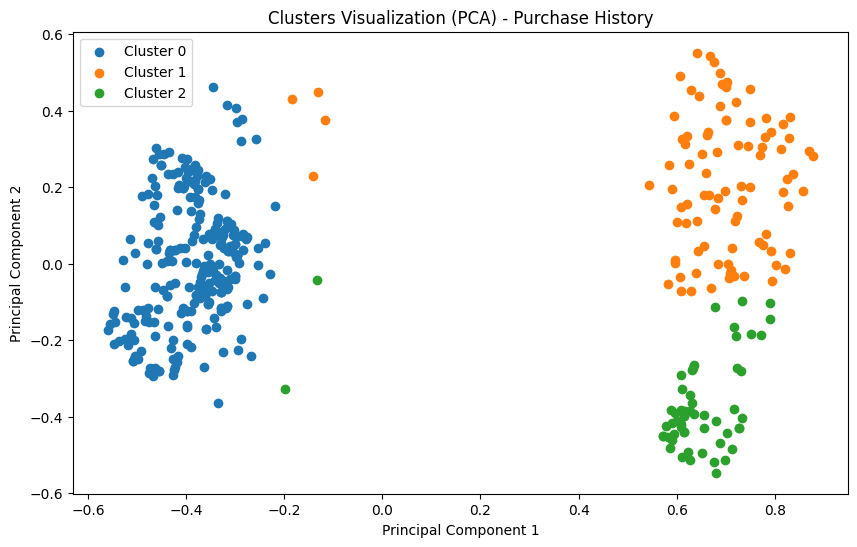

In [86]:
optimal_k = 3

# Visualize clusters for models_purchase_hist
optimal_model_purchase_hist = models_purchase_hist[optimal_k - 2] 
purchase_hist_df['cluster_labels'] = optimal_model_purchase_hist.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(purchase_hist_df.drop(columns=['cluster_labels'])) 

plt.figure(figsize=(10, 6))
for label in np.unique(purchase_hist_df['cluster_labels']):
    plt.scatter(components[purchase_hist_df['cluster_labels']==label, 0], components[purchase_hist_df['cluster_labels']==label, 1], label=f'Cluster {label}')
plt.title('Clusters Visualization (PCA) - Purchase History')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Text(0, 0.5, 'Silhouette Score')

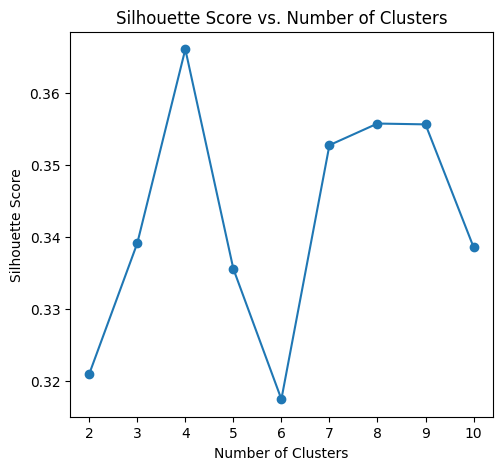

In [87]:
# Find Silhouette Score for optimal number of clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores_thoughts, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

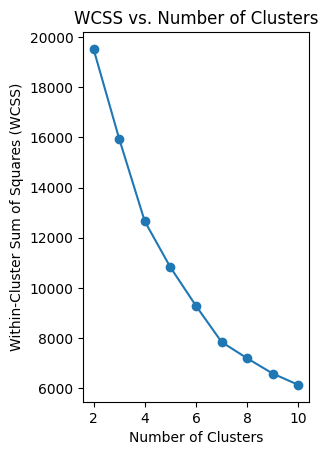

In [89]:
# Find WCSS 
plt.subplot(1, 2, 2)
plt.plot(k_values, wcss_scores_thoughts, marker='o')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [104]:
cluster_characteristics_thoughts = thoughts_df.groupby('cluster_labels').mean()  # Calculate mean values for each cluster
print(cluster_characteristics_thoughts)

                Segment Type  Segment Description    Answer       Count  \
cluster_labels                                                            
0                   0.048759             0.557146  0.501850  354.656028   
1                   0.657715             0.356082  0.513733    7.263427   
2                   0.717114             0.386613  0.518121    7.609396   
3                   0.000000             0.822179  0.499156   35.979396   

                Percentage  
cluster_labels              
0                 0.432504  
1                 0.070545  
2                 0.783886  
3                 0.235046  


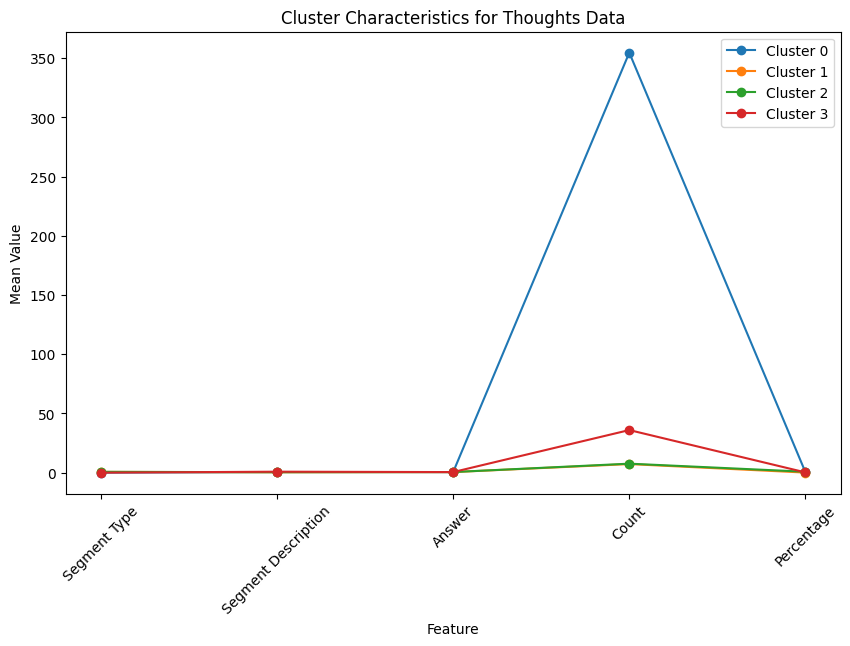

In [105]:
plt.figure(figsize=(10, 6))
for label in cluster_characteristics_thoughts.index:
    plt.plot(cluster_characteristics_thoughts.columns, cluster_characteristics_thoughts.loc[label], marker='o', label=f'Cluster {label}')
plt.title('Cluster Characteristics for Thoughts Data')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

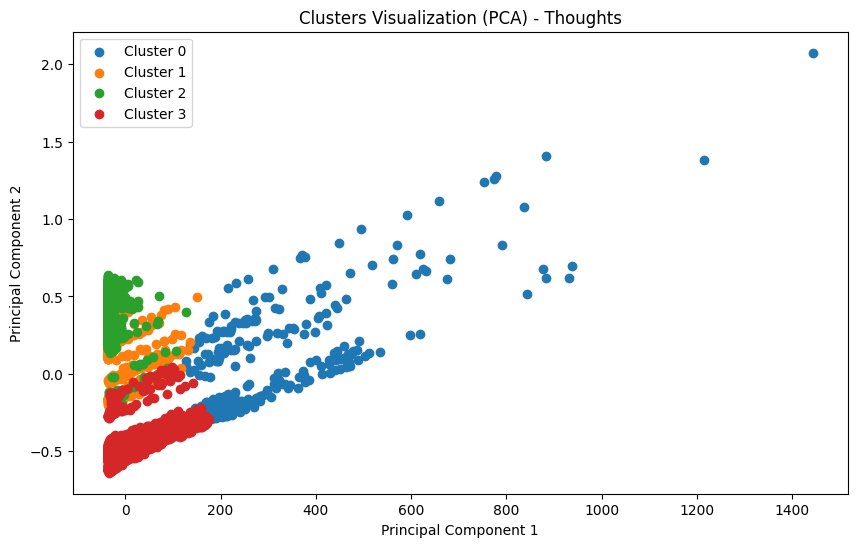

In [96]:
optimal_k = 4

# Visualize clusters for models_thoughts
optimal_model_thoughts = models_thoughts[optimal_k - 2] 
thoughts_df['cluster_labels'] = optimal_model_thoughts.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(thoughts_df.drop(columns=['cluster_labels'])) 

plt.figure(figsize=(10, 6))
for label in np.unique(thoughts_df['cluster_labels']):
    plt.scatter(components[thoughts_df['cluster_labels']==label, 0], components[thoughts_df['cluster_labels']==label, 1], label=f'Cluster {label}')
plt.title('Clusters Visualization (PCA) - Thoughts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()